# Data Import

In [25]:
import pandas as pd

# Import csv data
df = pd.read_csv("songs_normalize.csv")
print(df.shape)
df.head()

(2000, 18)


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Data Preparation

In [26]:
# Remove bad features
df = df.drop(columns=['artist', 'song', 'genre'])

# Semi-normalization of year
df['year'] = df['year'] - df['year'].min()

# Replace true/false with indicators
df = pd.get_dummies(df, columns=['explicit'], drop_first=True)
df = df.rename(columns = {'explicit_True':'explicit'})
df.head()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit
0,211160,2,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,0
1,167066,1,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,0
2,250546,1,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,0
3,224493,2,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,0
4,200560,2,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,0


# Summary Statistics

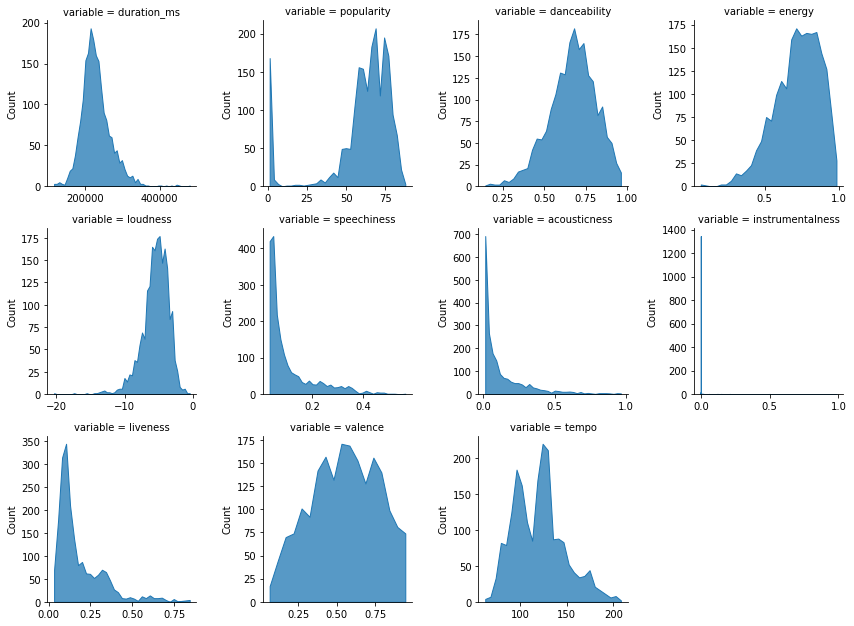

In [27]:
import seaborn as sns

# View feature distributions
long = pd.melt(df.drop(columns=['explicit', 'key', 'mode', 'year']))
g = sns.FacetGrid(long, col='variable', palette='Set1', col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, 'value', element='poly')
g.set(xlabel=None)

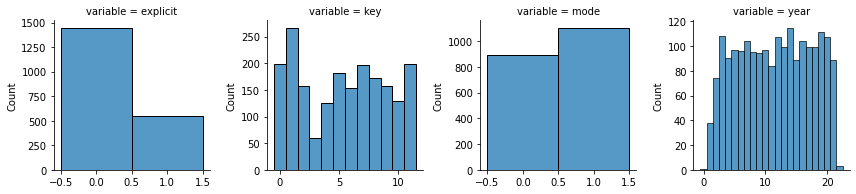

In [28]:
# Binned Data
long = pd.melt(df[['explicit', 'key', 'mode', 'year']])
g = sns.FacetGrid(long, col='variable', palette='Set1', col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, 'value', discrete=True)
g.set(xlabel=None)

<AxesSubplot:>

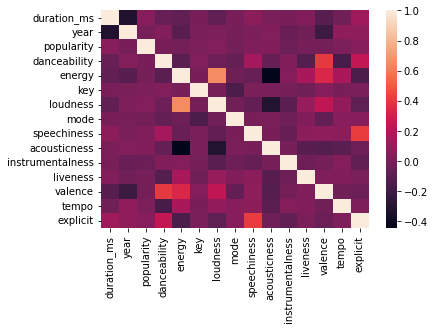

In [29]:
# Correlation chart
corr_matrix=df.corr()
sns.heatmap(corr_matrix)

## Observations
We observe some correlations between loudness/energy, valence/danceability, valence/energy, and explicit/speechiness.